In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import math
pd.set_option("display.max_columns", 101)
pd.set_option("display.max_rows", 101)
np.random.seed(123)
#https://www.analyticsvidhya.com/blog/2019/01/guide-pytorch-neural-networks-case-studies/
from sklearn.metrics import accuracy_score
from sklearn import linear_model, metrics, model_selection, ensemble
from sklearn.neural_network import MLPClassifier


In [114]:
df = pd.read_csv('./data/PBP - 2016 - Week 1.csv')
df2 = pd.read_csv('./data/PBP - 2016 - Week 2.csv')
df3 = pd.read_csv('./data/PBP - 2016 - Week 3.csv')
df = pd.concat([df, df2, df3])
df = df.dropna()

In [115]:
df = df.query('down == 4')

In [116]:
df['type'].unique()

array(['Punt', 'Penalty', 'Field Goal Good', 'Timeout',
       'Passing Touchdown', 'Rush', 'Field Goal Missed', 'Pass Reception',
       'Pass Incompletion', 'Kickoff', 'Blocked Field Goal', 'Sack',
       'Kickoff Return (Offense)', 'Fumble Recovery (Own)',
       'Rushing Touchdown', 'Fumble Recovery (Opponent)',
       'Pass Interception Return', 'Kickoff Return Touchdown',
       'Punt Return Touchdown', 'Blocked Punt', 'Safety',
       'Fumble Return Touchdown', 'Blocked Field Goal Touchdown',
       'Interception Return Touchdown'], dtype=object)

In [117]:
df = df.replace('Field Goal Good', 'Field Goal')
df = df.replace('Field Goal Missed', 'Field Goal')
df = df.replace('Blocked Field Goal', 'Field Goal')
df = df.replace('Blocked Field Goal Touchdown', 'Field Goal')
df = df.replace('Rushing Touchdown', 'Rush')
df = df.replace('Sack', 'Pass')
df = df.replace('Pass Interception Return', 'Pass')
df = df.replace('Passing Touchdown', 'Pass')
df = df.replace('Pass Incompletion', 'Pass')
df = df.replace('Interception Return Touchdown', 'Pass')
df = df.replace('Blocked Punt', 'Punt')
df = df.replace('Punt Return Touchdown', 'Punt')
df = df.replace('Pass Reception', 'Pass')
df['type'].unique()

array(['Punt', 'Penalty', 'Field Goal', 'Timeout', 'Pass', 'Rush',
       'Kickoff', 'Kickoff Return (Offense)', 'Fumble Recovery (Own)',
       'Fumble Recovery (Opponent)', 'Kickoff Return Touchdown', 'Safety',
       'Fumble Return Touchdown'], dtype=object)

In [118]:
df = df[(df.type == 'Pass') | (df.type == 'Rush') | (df.type == 'Field Goal') | (df.type == 'Punt')]
df['type'].unique()

array(['Punt', 'Field Goal', 'Pass', 'Rush'], dtype=object)

In [119]:
rel_freq

Rush    8343
Punt     995
Name: type, dtype: int64

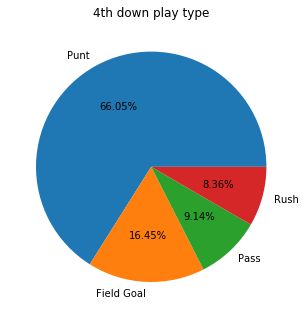

In [120]:
rel_freq = df['type'].value_counts()

plt.pie(rel_freq, labels = ('Punt', 'Field Goal', 'Pass', 'Rush'), autopct='%.2f%%')
plt.title("4th down play type")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [47]:
offense = df.query('homeTeam == offenseTeam')

In [48]:
offense_stats = pd.read_csv('./data/Offense Stats 2016.csv')
offense = offense.join(offense_stats.set_index('School'), on='homeTeam')
offense = offense.dropna()
features = offense[['homeScore', 'awayScore', 'quarter', 'distance', 'yardLine', 'Rk', 'G', 'Pts', 'Passing Completion', 'Pass Attemps', 'completion percentage', 'passing yards', 'Passing Touchdowns', 'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns', 'Total Offense Plays', 'Total yards', 'total yards per play', 'First down by pass', 'First down by rush']]
labels = offense[['type']]

## Making the models

In [53]:
labels = labels.replace('Punt', 0)
labels = labels.replace('Field Goal', 1)
labels = labels.replace('Pass', 2)
labels = labels.replace('Rush', 3)

In [55]:
clf = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(features, labels)
clf

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Test the model

In [58]:
week4 = pd.read_csv('./data/PBP - 2016 - Week 4.csv')
week5 = pd.read_csv('./data/PBP - 2016 - Week 5.csv')
test = pd.concat([week4, week5])
test = test.dropna()
test = test.query('down == 4')
test

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,playIndex,offenseId,offenseTeam,offenseAbbr,defenseId,defenseTeam,defenseAbbr,homeScore,awayScore,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description
17,400868878,2016,4,239,Baylor,BAY,197,Oklahoma State,OKST,1,8,197,Oklahoma State,OKST,239,Baylor,BAY,7,0,1,9:48,2016-09-25T08:24:36Z,Punt,4,2,60,1,5,"Zach Sinor punt for 56 yds , Tony Nicholson re..."
31,400868878,2016,4,239,Baylor,BAY,197,Oklahoma State,OKST,3,12,239,Baylor,BAY,197,Oklahoma State,OKST,7,7,1,7:27,2016-09-25T08:33:57Z,Rush,4,4,86,3,89,Terence Williams run for 3 yds to the OKSt 11
55,400868878,2016,4,239,Baylor,BAY,197,Oklahoma State,OKST,6,13,197,Oklahoma State,OKST,239,Baylor,BAY,7,7,2,14:20,2016-09-25T08:57:49Z,Timeout,4,2,27,0,27,"Timeout OKLAHOMA ST, clock 14:20"
56,400868878,2016,4,239,Baylor,BAY,197,Oklahoma State,OKST,6,14,197,Oklahoma State,OKST,239,Baylor,BAY,7,7,2,14:16,2016-09-25T09:01:17Z,Field Goal Missed,4,2,27,44,27,Ben Grogan 44 yd FG MISSED
85,400868878,2016,4,239,Baylor,BAY,197,Oklahoma State,OKST,9,4,239,Baylor,BAY,197,Oklahoma State,OKST,14,14,2,4:31,2016-09-25T09:27:09Z,Punt,4,14,12,0,56,"Drew Galitz punt for 44 yds, fair catch by Bar..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,400869821,2016,5,326,Texas State,TXST,2916,Incarnate Word,IW,18,4,2916,Incarnate Word,IW,326,Texas State,TXST,21,10,3,7:21,2016-10-02T09:07:21Z,Punt,4,8,82,0,58,"Oscar Draguicevich punt, downed at the InWrd 42"
11162,400869821,2016,5,326,Texas State,TXST,2916,Incarnate Word,IW,20,4,2916,Incarnate Word,IW,326,Texas State,TXST,28,10,3,4:37,2016-10-02T09:12:30Z,Punt,4,8,72,0,37,"Oscar Draguicevich punt for 35 yds, fair catch..."
11178,400869821,2016,5,326,Texas State,TXST,2916,Incarnate Word,IW,22,5,2916,Incarnate Word,IW,326,Texas State,TXST,34,10,4,15:00,2016-10-02T09:30:22Z,Punt,4,5,50,0,16,"Oscar Draguicevich punt for 34 yds, fair catch..."
11189,400869821,2016,5,326,Texas State,TXST,2916,Incarnate Word,IW,23,10,326,Texas State,TXST,2916,Incarnate Word,IW,34,10,4,14:11,2016-10-02T09:39:38Z,Rush,4,1,81,0,81,Tyler Siudzinski run for no gain to the InWrd 19


In [60]:
test = test.replace('Field Goal Good', 'Field Goal')
test = test.replace('Field Goal Missed', 'Field Goal')
test = test.replace('Blocked Field Goal', 'Field Goal')
test = test.replace('Blocked Field Goal Touchdown', 'Field Goal')
test = test.replace('Missed Field Goal Return', 'Field Goal')
test = test.replace('Rushing Touchdown', 'Rush')
test = test.replace('Sack', 'Pass')
test = test.replace('Pass Interception Return', 'Pass')
test = test.replace('Passing Touchdown', 'Pass')
test = test.replace('Pass Incompletion', 'Pass')
test = test.replace('Interception Return Touchdown', 'Pass')
test = test.replace('Blocked Punt', 'Punt')
test = test.replace('Punt Return Touchdown', 'Punt')
test = test.replace('Pass Reception', 'Pass')
test['type'].unique()

array(['Punt', 'Rush', 'Timeout', 'Field Goal', 'Kickoff', 'Pass',
       'Penalty', 'Fumble Recovery (Opponent)', 'Fumble Recovery (Own)',
       'Kickoff Return (Offense)', 'Safety'], dtype=object)

In [61]:
test = test[(test.type == 'Pass') | (test.type == 'Rush') | (test.type == 'Field Goal') | (test.type == 'Punt')]
test['type'].unique()

array(['Punt', 'Rush', 'Field Goal', 'Pass'], dtype=object)

In [62]:
test_offense = test.query('homeTeam == offenseTeam')
test_offense = test_offense.join(offense_stats.set_index('School'), on='homeTeam')
test_offense = test_offense.dropna()
test_offense

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,playIndex,offenseId,offenseTeam,offenseAbbr,defenseId,defenseTeam,defenseAbbr,homeScore,awayScore,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description,Rk,G,Pts,Passing Completion,Pass Attemps,completion percentage,passing yards,Passing Touchdowns,Rush Attempts,Rushing yards,rush average,Rush Touchdowns,Total Offense Plays,Total yards,total yards per play,First down by pass,First down by rush,Number of Penalties,Penalty yards
31,400868878,2016,4,239,Baylor,BAY,197,Oklahoma State,OKST,3,12,239,Baylor,BAY,197,Oklahoma State,OKST,7,7,1,7:27,2016-09-25T08:33:57Z,Rush,4,4,86,3,89,Terence Williams run for 3 yds to the OKSt 11,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
85,400868878,2016,4,239,Baylor,BAY,197,Oklahoma State,OKST,9,4,239,Baylor,BAY,197,Oklahoma State,OKST,14,14,2,4:31,2016-09-25T09:27:09Z,Punt,4,14,12,0,56,"Drew Galitz punt for 44 yds, fair catch by Bar...",35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
105,400868878,2016,4,239,Baylor,BAY,197,Oklahoma State,OKST,13,6,239,Baylor,BAY,197,Oklahoma State,OKST,21,14,2,0:24,2016-09-25T09:42:54Z,Punt,4,8,58,0,80,Seth Russell punt for 42 yds for a touchback,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
146,400868878,2016,4,239,Baylor,BAY,197,Oklahoma State,OKST,18,4,239,Baylor,BAY,197,Oklahoma State,OKST,28,24,3,0:46,2016-09-25T10:44:46Z,Rush,4,1,24,0,24,Terence Williams run for no gain to the Bayl 24,35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
161,400868878,2016,4,239,Baylor,BAY,197,Oklahoma State,OKST,20,5,239,Baylor,BAY,197,Oklahoma State,OKST,28,24,4,11:01,2016-09-24T11:00:47Z,Punt,4,4,24,0,77,"Drew Galitz punt for 53 yds, downed at the OKS...",35.0,13.0,34.6,20.7,36.9,56.0,280.9,2.5,48.3,241.8,5.0,1.9,85.2,522.7,6.1,10.8,13.4,9.9,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11070,400869821,2016,5,326,Texas State,TXST,2916,Incarnate Word,IW,6,10,326,Texas State,TXST,2916,Incarnate Word,IW,0,7,2,13:09,2016-10-02T07:26:33Z,Field Goal,4,1,86,31,82,James Sherman 31 yd FG BLOCKED blocked by Eric...,124.0,12.0,18.6,21.4,34.6,61.9,219.9,1.2,35.5,82.4,2.3,1.1,70.1,302.3,4.3,10.8,5.5,6.8,57.3
11132,400869821,2016,5,326,Texas State,TXST,2916,Incarnate Word,IW,15,4,326,Texas State,TXST,2916,Incarnate Word,IW,21,10,3,14:46,2016-10-02T08:42:37Z,Rush,4,1,70,5,75,Stedman Mayberry run for 5 yds to the InWrd 25...,124.0,12.0,18.6,21.4,34.6,61.9,219.9,1.2,35.5,82.4,2.3,1.1,70.1,302.3,4.3,10.8,5.5,6.8,57.3
11137,400869821,2016,5,326,Texas State,TXST,2916,Incarnate Word,IW,15,9,326,Texas State,TXST,2916,Incarnate Word,IW,21,10,3,14:46,2016-10-02T08:47:38Z,Punt,4,18,67,0,80,Lumi Kaba punt for 33 yds for a touchback,124.0,12.0,18.6,21.4,34.6,61.9,219.9,1.2,35.5,82.4,2.3,1.1,70.1,302.3,4.3,10.8,5.5,6.8,57.3
11149,400869821,2016,5,326,Texas State,TXST,2916,Incarnate Word,IW,17,5,326,Texas State,TXST,2916,Incarnate Word,IW,21,10,3,8:45,2016-10-02T08:54:50Z,Punt,4,8,43,0,84,"Lumi Kaba punt for 41 yds , Marquis Lawson ret...",124.0,12.0,18.6,21.4,34.6,61.9,219.9,1.2,35.5,82.4,2.3,1.1,70.1,302.3,4.3,10.8,5.5,6.8,57.3


In [66]:
test_features = test_offense[['homeScore', 'awayScore', 'quarter', 'distance', 'yardLine', 'Rk', 'G', 'Pts', 'Passing Completion', 'Pass Attemps', 'completion percentage', 'passing yards', 'Passing Touchdowns', 'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns', 'Total Offense Plays', 'Total yards', 'total yards per play', 'First down by pass', 'First down by rush']]
test_labels = test_offense[['type']]
test_labels = test_labels.replace('Punt', 0)
test_labels = test_labels.replace('Field Goal', 1)
test_labels = test_labels.replace('Pass', 2)
test_labels = test_labels.replace('Rush', 3)

In [67]:
clf.score(test_features, test_labels)

0.8126888217522659

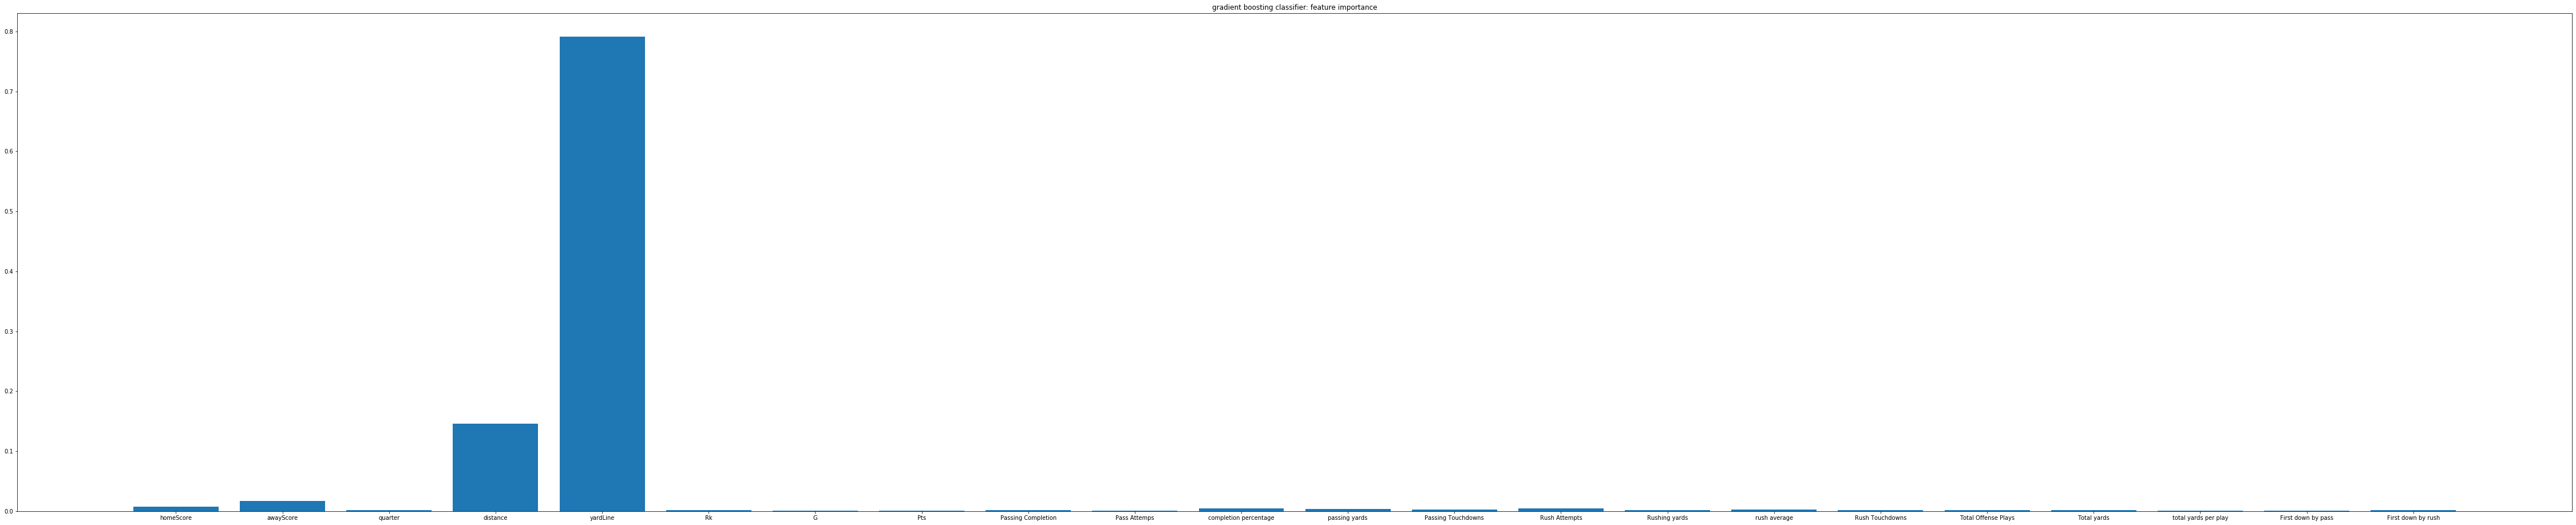

In [69]:
features = ['homeScore', 'awayScore', 'quarter', 'distance', 'yardLine', 'Rk', 'G', 'Pts', 'Passing Completion', 'Pass Attemps', 'completion percentage', 'passing yards', 'Passing Touchdowns', 'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns', 'Total Offense Plays', 'Total yards', 'total yards per play', 'First down by pass', 'First down by rush']

feature_importance = clf.feature_importances_.tolist()
fig, ax = plt.subplots(1,1,figsize=(80,16))
plt.clf()
plt.bar(features,feature_importance)
plt.title("gradient boosting classifier: feature importance")
plt.show()

In [71]:
import pickle
filename = 'models/4th_down_classifier.sav'
pickle.dump(clf, open(filename, 'wb'))

In [121]:
confusion_matrix = metrics.confusion_matrix(test_labels, clf.predict(test_features))

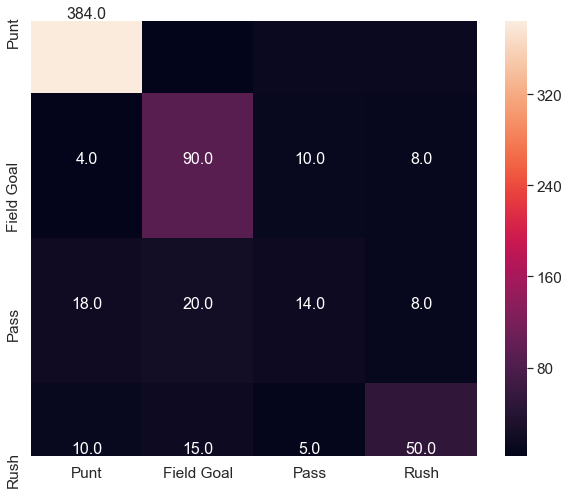

In [135]:
import seaborn as sns
plt.figure(figsize = (10,8))
# fig, ax = plt.subplots(1,1,figsize=(20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16, "ha": 'center',"va": 'bottom'}, fmt=".1f",
            xticklabels=['Punt', 'Field Goal', 'Pass', 'Rush'], yticklabels=['Punt', 'Field Goal', 'Pass', 'Rush'])# font size


## Get the Results of a Field Goal

In [136]:
df = pd.read_csv('./data/PBP - 2016 - Week 1.csv')
df2 = pd.read_csv('./data/PBP - 2016 - Week 2.csv')
df3 = pd.read_csv('./data/PBP - 2016 - Week 3.csv')
df = pd.concat([df, df2, df3])
df = df.dropna()

In [137]:
special_teams_stats = pd.read_csv('./data/Special Teams Stats 2016.csv')

In [138]:
df = df.query('homeTeam == offenseTeam')
special_teams = df.join(special_teams_stats.set_index('School'), on='homeTeam')
special_teams = special_teams.dropna()
special_teams

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,playIndex,offenseId,offenseTeam,offenseAbbr,defenseId,defenseTeam,defenseAbbr,homeScore,awayScore,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description,Rk,FG made,FG attempted,FG%,Pts kicking,Punts,Punting yds,average yards per punt,kickoff return yards,kickoff return yards per kickoff,punt returns,punt return yards,punt return yards per return
0,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,1,15:00,2016-09-03T06:36:41Z,Kickoff,1,10,35,10,86,"Drew Galitz kickoff for 61 yds , Shakeir Ryan ...",12.0,0.8,1.2,62.5,6.8,4.4,181.5,41.4,51.5,19.1,1.8,17.2,9.7
6,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,1,0,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,1,12:45,2016-09-03T06:41:38Z,Pass Reception,1,10,41,6,47,Seth Russell pass complete to KD Cannon for 6 ...,12.0,0.8,1.2,62.5,6.8,4.4,181.5,41.4,51.5,19.1,1.8,17.2,9.7
7,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,1,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,1,12:45,2016-09-03T06:41:38Z,Rush,2,4,47,3,50,Shock Linwood run for 3 yds to the 50 yard line,12.0,0.8,1.2,62.5,6.8,4.4,181.5,41.4,51.5,19.1,1.8,17.2,9.7
8,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,1,2,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,1,12:45,2016-09-03T06:41:38Z,Penalty,3,1,50,-10,40,"Linwood,Shock rush for 3 yards to the NWST47 (...",12.0,0.8,1.2,62.5,6.8,4.4,181.5,41.4,51.5,19.1,1.8,17.2,9.7
9,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,1,3,239,Baylor,BAY,2466,Northwestern St,NWST,0,0,1,12:45,2016-09-03T06:41:38Z,Rush,3,11,40,42,82,Shock Linwood run for 42 yds to the NWSt 18 fo...,12.0,0.8,1.2,62.5,6.8,4.4,181.5,41.4,51.5,19.1,1.8,17.2,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12610,400869814,2016,3,309,Louisiana,ULL,6,South Alabama,USA,25,4,309,Louisiana,ULL,6,South Alabama,USA,28,23,4,3:17,2016-09-18T09:04:24Z,Rush,1,10,72,4,76,Elijah McGuire run for 4 yds to the SAlab 24,49.0,1.5,1.8,79.2,6.7,5.1,219.5,43.2,54.6,17.8,1.2,6.7,5.4
12611,400869814,2016,3,309,Louisiana,ULL,6,South Alabama,USA,25,5,309,Louisiana,ULL,6,South Alabama,USA,28,23,4,3:17,2016-09-18T09:04:24Z,Rush,2,6,76,-1,75,Elijah McGuire run for a loss of 1 yard to the...,49.0,1.5,1.8,79.2,6.7,5.1,219.5,43.2,54.6,17.8,1.2,6.7,5.4
12612,400869814,2016,3,309,Louisiana,ULL,6,South Alabama,USA,25,6,309,Louisiana,ULL,6,South Alabama,USA,28,23,4,0:23,2016-09-18T08:22:05Z,Timeout,3,7,75,0,75,"Timeout SOUTH ALABAMA, clock 00:23",49.0,1.5,1.8,79.2,6.7,5.1,219.5,43.2,54.6,17.8,1.2,6.7,5.4
12613,400869814,2016,3,309,Louisiana,ULL,6,South Alabama,USA,25,7,309,Louisiana,ULL,6,South Alabama,USA,28,23,4,0:23,2016-09-18T08:22:05Z,Rush,3,7,75,-5,70,TEAM run for a loss of 5 yards to the SAlab 30,49.0,1.5,1.8,79.2,6.7,5.1,219.5,43.2,54.6,17.8,1.2,6.7,5.4


In [139]:
special_teams = special_teams.replace('Blocked Field Goal', 'Field Goal Missed')
special_teams['type'].unique()

array(['Kickoff', 'Pass Reception', 'Rush', 'Penalty',
       'Pass Incompletion', 'Rushing Touchdown', 'Field Goal Good',
       'Timeout', 'Passing Touchdown', 'Punt',
       'Fumble Recovery (Opponent)', 'End of Game', 'End Period', 'Sack',
       'Safety', 'Pass Interception Return', 'End of Half',
       'Defensive 2pt Conversion', 'Kickoff Return (Offense)',
       'Fumble Recovery (Own)', 'Field Goal Missed',
       'Interception Return Touchdown', 'Blocked Punt',
       'Fumble Return Touchdown'], dtype=object)

In [140]:
special_teams = special_teams[(special_teams.type == 'Field Goal Good') | (special_teams.type == 'Field Goal Missed')]

In [141]:
special_teams = special_teams.dropna()
special_teams

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,playIndex,offenseId,offenseTeam,offenseAbbr,defenseId,defenseTeam,defenseAbbr,homeScore,awayScore,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description,Rk,FG made,FG attempted,FG%,Pts kicking,Punts,Punting yds,average yards per punt,kickoff return yards,kickoff return yards per kickoff,punt returns,punt return yards,punt return yards per return
25,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,3,6,239,Baylor,BAY,2466,Northwestern St,NWST,10,0,1,6:52,2016-09-03T07:03:07Z,Field Goal Good,4,0,94,23,35,Chris Callahan 23 yd FG GOOD,12.0,0.8,1.2,62.5,6.8,4.4,181.5,41.4,51.5,19.1,1.8,17.2,9.7
71,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,9,7,239,Baylor,BAY,2466,Northwestern St,NWST,27,0,2,10:19,2016-09-03T07:50:28Z,Field Goal Good,4,6,84,33,35,Chris Callahan 33 yd FG GOOD,12.0,0.8,1.2,62.5,6.8,4.4,181.5,41.4,51.5,19.1,1.8,17.2,9.7
438,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,6,3,218,Temple,TEM,349,Army,ARMY,10,7,2,2:51,2016-09-03T07:14:48Z,Field Goal Good,4,11,76,41,35,Austin Jones 41 yd FG GOOD,99.0,1.8,2.1,86.2,9.1,3.8,147.5,39.0,43.8,21.9,1.3,13.6,10.6
485,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,10,16,218,Temple,TEM,349,Army,ARMY,13,14,3,1:29,2016-09-03T07:51:26Z,Field Goal Good,4,0,90,27,35,Austin Jones 27 yd FG GOOD,99.0,1.8,2.1,86.2,9.1,3.8,147.5,39.0,43.8,21.9,1.3,13.6,10.6
652,400868946,2016,1,251,Texas,TEX,87,Notre Dame,ND,14,10,251,Texas,TEX,87,Notre Dame,ND,31,14,3,9:14,2016-09-05T08:40:21Z,Field Goal Good,4,6,92,25,92,Trent Domingue 25 yd FG GOOD,101.0,1.4,2.0,70.8,7.6,5.5,259.6,47.2,64.4,18.4,2.3,15.2,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11918,400869657,2016,3,275,Wisconsin,WIS,2247,Georgia State,GAST,2,9,275,Wisconsin,WIS,2247,Georgia State,GAST,6,0,1,0:51,2016-09-17T23:28:25Z,Field Goal Good,4,1,90,28,90,Rafael Gaglianone 28 yd FG GOOD,127.0,1.4,1.9,74.1,7.5,4.7,176.6,37.5,36.8,19.8,1.5,10.2,6.8
11970,400869657,2016,3,275,Wisconsin,WIS,2247,Georgia State,GAST,8,9,275,Wisconsin,WIS,2247,Georgia State,GAST,6,0,2,0:00,2016-09-17T23:36:34Z,Field Goal Missed,1,10,88,30,80,Rafael Gaglianone 30 yd FG MISSED,127.0,1.4,1.9,74.1,7.5,4.7,176.6,37.5,36.8,19.8,1.5,10.2,6.8
12044,400869657,2016,3,275,Wisconsin,WIS,2247,Georgia State,GAST,18,7,275,Wisconsin,WIS,2247,Georgia State,GAST,23,17,4,3:36,2016-09-18T01:55:48Z,Field Goal Good,4,8,77,41,77,Rafael Gaglianone 41 yd FG GOOD,127.0,1.4,1.9,74.1,7.5,4.7,176.6,37.5,36.8,19.8,1.5,10.2,6.8
12476,400869814,2016,3,309,Louisiana,ULL,6,South Alabama,USA,3,3,309,Louisiana,ULL,6,South Alabama,USA,6,0,1,3:17,2016-09-18T06:27:21Z,Field Goal Missed,4,8,77,40,77,Stevie Artigue 40 yd FG MISSED,49.0,1.5,1.8,79.2,6.7,5.1,219.5,43.2,54.6,17.8,1.2,6.7,5.4


In [142]:
special_teams_features = special_teams[['yardLine', 'FG made', 'FG%']]

In [143]:
def getFGResult(df_type):
    if(df_type == 'Field Goal Good'):
        return 1
    else:
        return 0

In [144]:
for index,row in special_teams.iterrows():
    special_teams.at[index,'result'] = getFGResult(row['type'])

In [145]:
special_teams_labels = special_teams['result']

In [146]:
sp = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(special_teams_features, special_teams_labels)

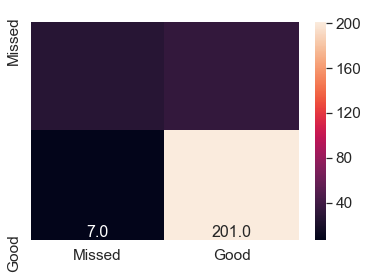

In [150]:
confusion_matrix = metrics.confusion_matrix(special_teams_labels, sp.predict(special_teams_features))
# plt.figure(figsize = (10,8))
# fig, ax = plt.subplots(1,1,figsize=(20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16, "ha": 'center',"va": 'bottom'}, fmt=".1f",
            xticklabels=['Missed', 'Good'], yticklabels=['Missed', 'Good'])# font size


In [151]:
confusion_matrix

array([[ 27,  33],
       [  7, 201]])

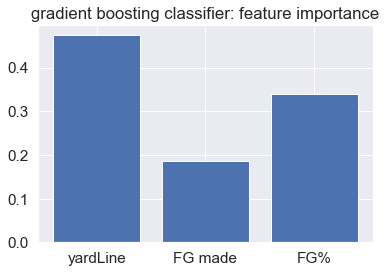

In [147]:
features = ['yardLine', 'FG made', 'FG%']

feature_importance = sp.feature_importances_.tolist()
plt.clf()
plt.bar(features,feature_importance)
plt.title("gradient boosting classifier: feature importance")
plt.show()

In [105]:
import pickle
filename = 'models/field_goal_made.sav'
pickle.dump(sp, open(filename, 'wb'))